# MASTER - Notebook 2
### Matteo Grazioso 884055

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


import warnings
warnings.filterwarnings('ignore')

# Create a requirements.txt file
!pip freeze > requirements.txt


In [23]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
# The data is in the same directory as the notebook and is named 'df_new.txt'
# The file contains the data of the validation of tickets in the city of public transport of Venice.
# The file has been created by the Notebook 1.ipynb

# Import the data into a dataframe of a txt file
df = pd.read_csv('df_new.txt', header=0, sep='\t')

# Display the first 5 rows of the dataframe
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO,TICKET_CODE
0,13/05/2022 00:00,65676291870913797,5089,FERROVIA,11149,"7gg-Tpl 43,60-ComVe16,40",4
1,13/05/2022 00:00,36141384536591364,5032,FERROVIA,11107,"48h-Tpl 24,90-ComVe5,10",2
2,13/05/2022 00:00,36144856606063108,5031,P.LE ROMA,11108,"72h-Tpl 33,40-ComVe6,60",3
3,13/05/2022 00:00,36144856474364932,506,VENEZIA,11261,DAILY PASS VENEZIA - AVM,1
4,13/05/2022 00:00,36144856606062852,5031,P.LE ROMA,11108,"72h-Tpl 33,40-ComVe6,60",3


In [25]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
# DATA must be the first column of the dataframe, ORA must be the second column of the dataframe; so use the parameter 'insert' to insert the new columns in the right position
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

# TODO: #3 Move this code above to the Notebook 1.ipynb


,DATA,ORA,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO,TICKET_CODE
0,2022-05-13,00:00:00,65676291870913797,5089,FERROVIA,11149,"7gg-Tpl 43,60-ComVe16,40",4
1,2022-05-13,00:00:00,36141384536591364,5032,FERROVIA,11107,"48h-Tpl 24,90-ComVe5,10",2
2,2022-05-13,00:00:00,36144856606063108,5031,P.LE ROMA,11108,"72h-Tpl 33,40-ComVe6,60",3
3,2022-05-13,00:00:00,36144856474364932,506,VENEZIA,11261,DAILY PASS VENEZIA - AVM,1
4,2022-05-13,00:00:00,36144856606062852,5031,P.LE ROMA,11108,"72h-Tpl 33,40-ComVe6,60",3


---------


## Focus on specific types of tickets

In [26]:
from datetime import datetime

def to_datetime(date):
    """
    Converts a numpy datetime64 object to a python datetime object 
    Input:
      date - a np.datetime64 object
    Output:
      DATE - a python datetime object
    """
    timestamp = ((date - np.datetime64('1970-01-01T00:00:00'))
                 / np.timedelta64(1, 's'))
    return datetime.utcfromtimestamp(timestamp)

# Credits: Brian Blaylock in GitHub Gist https://gist.github.com/blaylockbk/1677b446bc741ee2db3e943ab7e4cabd 

In [27]:
def focus_on_ticket_type(df_tt, ticket_type):
    """
        This function returns a dataframe with only the rows of the specified ticket type.
        :param df: the dataframe
        :param ticket_type: the ticket type
        :return: the dataframe with only the rows of the specified ticket type
    """
    # Select only the rows of the specified ticket type
    df_tt = df_tt[df['DESCRIZIONE_TITOLO'] == ticket_type]
    df_tt.head()
    # Print the cardinality of the dataframe
    print('The dataframe of the ticket type', ticket_type, 'has', df_tt.shape[0], 'rows and', df_tt.shape[1], 'columns')
    return df_tt

def number_of_tickets_per_day(df_d, target_ticket_type):
    """
        This function plots the number of validations of the specified ticket type for each day.
        :param df: the dataframe
        :param target_ticket_type: the ticket type
        :return: None
    """
    # Group the dataframe by date and hour and count the number of validations of the specified ticket type
    df_d = df_d.groupby('DATA').count()['SERIALE'].reset_index()
    df_d['cumulative_sum'] = df_d.groupby('DATA')['SERIALE'].cumsum()
    
    # Plot the cumulative sum of the number of validations of the ticket "abbonamento 30 gg.PeopleMover" for each day
    plt.figure(figsize=(20, 10))
    plt.plot(df_d['DATA'], df_d['cumulative_sum'])

    plt.title('Cumulative sum of the number of validations of the ticket "{}" for each day'.format(target_ticket_type), fontsize=20)
    plt.xlabel('Date - days', fontsize=15)
    plt.ylabel('Cumulative sum', fontsize=15)

    # Calculate the step of the y-axis
    step = int(df_d['SERIALE'].max()/10)
    # Manage the y-axis
    plt.yticks(ticks=np.arange(0, df_d['cumulative_sum'].max()+step, step))

    # Manage the y-axis, print only year and month; print all
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.show()

def min_max_number_of_tickets_per_day(df_d, target_ticket_type):
    """
        This function prints the day with the highest and the day with the lowest number of validations of the specified ticket type.
        :param df: the dataframe
        :param target_ticket_type: the ticket type
        :return: None
    """
    # Group the dataframe by date and hour and count the number of validations of the specified ticket type
    df_d = df.groupby('DATA').count()['SERIALE'].reset_index()
    max = df_d[df['SERIALE'] == df_d['SERIALE'].max()]
    min = df_d[df_d['SERIALE'] == df_d['SERIALE'].min()]

    print('The day with the highest number of validations of the ticket "{}" is {} with {} validations'.format(target_ticket_type, to_datetime(max['DATA'].values[0]).strftime('%Y-%m-%d'), max['SERIALE'].values[0]))
    print('The day with the lowest number of validations of the ticket "{}" is {} with {} validations'.format(target_ticket_type, to_datetime(min['DATA'].values[0]).strftime('%Y-%m-%d'), min['SERIALE'].values[0]))

def barplot_number_of_tickets_per_month(df_m, target_ticket_type):
    """
        This function plots the number of validations of the specified ticket type for each month.
        :param df: the dataframe
        :param target_ticket_type: the ticket type
        :return: None
    """
    # Create a dataframe with the number of validations of the target ticket for each month
    df_m = df_m.groupby(df_m['DATA'].dt.strftime('%Y-%m')).count()['SERIALE'].reset_index()

    # Plot the number of validations of the target ticket for each month
    plt.figure(figsize=(20, 10))
    # insert the line
    plt.bar(df_m['DATA'], df_m['SERIALE'])

    plt.title('Number of validations of the ticket "{}" for each month'.format(target_ticket_type), fontsize=20)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel('Number of validations', fontsize=15)

    # Calculate the step of the y-axis
    step = int(df_m['SERIALE'].max()/10)
    # Manage the y-axis
    plt.yticks(ticks=np.arange(0, df_m['SERIALE'].max()+step, step))

    # Insert the percentage of the number of validations of the target ticket for each month on the top of the bar
    for index, value in enumerate(df_m['SERIALE']):
        plt.text(index, value, str(round(value/df_m['SERIALE'].sum()*100, 2))+'%', ha='center', va='bottom', 
                fontsize=12, color='black', fontweight='bold')
    plt.show()  


In [28]:
# Focus on TICKET_CODE
def focus_on_ticket_code(df_tc, ticket_code):
    """
        This function returns a dataframe with only the rows of the specified ticket code.
        :param df: the dataframe
        :param ticket_code: the ticket code
        :return: the dataframe with only the rows of the specified ticket code
    """
    # Select only the rows of the specified ticket code
    df_tc = df_tc[df_tc['TICKET_CODE'] == ticket_code]
    df_tc.head()
    # Print the cardinality of the dataframe
    print('The dataframe of the ticket code', ticket_code, 'has', df_tc.shape[0], 'rows and', df_tc.shape[1], 'columns')
    return df_tc

def number_of_tickets_per_day(df_d, target_ticket_code):
    """
        This function plots the number of validations of the specified ticket code for each day.
        :param df: the dataframe
        :param target_ticket_code: the ticket code
        :return: None
    """
    # Group the dataframe by date and hour and count the number of validations of the specified ticket code
    df_d = df_d.groupby('DATA').count()['SERIALE'].reset_index()
    df_d['cumulative_sum'] = df_d.groupby('DATA')['SERIALE'].cumsum()
    
    # Plot the cumulative sum of the number of validations of the ticket "abbonamento 30 gg.PeopleMover" for each day
    plt.figure(figsize=(20, 10))
    plt.plot(df_d['DATA'], df_d['cumulative_sum'])

    plt.title('Cumulative sum of the number of validations of the ticket "{}" for each day'.format(target_ticket_code), fontsize=20)
    plt.xlabel('Date - days', fontsize=15)
    plt.ylabel('Cumulative sum', fontsize=15)

    # Calculate the step of the y-axis
    step = int(df_d['cumulative_sum'].max()/10)
    # Manage the y-axis
    plt.yticks(ticks=np.arange(0, df_d['cumulative_sum'].max()+step, step))

    # Manage the y-axis, print only year and month; print all
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.show()

def min_max_number_of_tickets_per_day(df_d, target_ticket_code):
    """
        This function prints the day with the highest and the day with the lowest number of validations of the specified ticket code.
        :param df: the dataframe
        :param target_ticket_code: the ticket code
        :return: None
    """
    # Group the dataframe by date and hour and count the number of validations of the specified ticket code
    df_d = df_d.groupby('DATA').count()['SERIALE'].reset_index()
    max = df_d[df_d['SERIALE'] == df_d['SERIALE'].max()]
    min = df_d[df_d['SERIALE'] == df_d['SERIALE'].min()]

    print('The day with the highest number of validations of the ticket "{}" is {} with {} validations'.format(target_ticket_code, to_datetime(max['DATA'].values[0]).strftime('%Y-%m-%d'), max['SERIALE'].values[0]))
    print('The day with the lowest number of validations of the ticket "{}" is {} with {} validations'.format(target_ticket_code, to_datetime(min['DATA'].values[0]).strftime('%Y-%m-%d'), min['SERIALE'].values[0]))

def barplot_number_of_tickets_per_month(df_m, target_ticket_code):
    """
        This function plots the number of validations of the specified ticket code for each month.
        :param df: the dataframe
        :param target_ticket_code: the ticket code
        :return: None
    """
    # Create a dataframe with the number of validations of the target ticket for each month
    df_m = df_m.groupby(df_m['DATA'].dt.strftime('%Y-%m')).count()['SERIALE'].reset_index()

    # Plot the number of validations of the target ticket for each month
    plt.figure(figsize=(20, 10))
    # insert the line
    plt.bar(df_m['DATA'], df_m['SERIALE'])

    plt.title('Number of validations of the ticket "{}" for each month'.format(target_ticket_code), fontsize=20)
    plt.xlabel('Month', fontsize=15)
    plt.ylabel('Number of validations', fontsize=15)

    # Calculate the step of the y-axis
    step = int(df_m['SERIALE'].max()/10)
    # Manage the y-axis
    plt.yticks(ticks=np.arange(0, df_m['SERIALE'].max()+step, step))

    # Insert the percentage of the number of validations of the target ticket for each month on the top of the bar
    for index, value in enumerate(df_m['SERIALE']):
        plt.text(index, value, str(round(value/df_m['SERIALE'].sum()*100, 2))+'%', ha='center', va='bottom', 
                fontsize=12, color='black', fontweight='bold')
    plt.show()

In [29]:
# Focus on all TICKET_CODEs
def focus_on_all_ticket_codes(df_tca, dictionary):
    """
        This function focuses on the different ticket codes.
        :param df_tca: the dataframe
        :param dictionary: the dictionary with the ticket codes and their description
        :return: None
    """
    # Open the dictionary
    import json
    with open(dictionary) as f:
        dict_ticket_code = json.load(f)

    for ticket_code in dict_ticket_code.keys():
        # Select only the rows of the specified ticket code
        df_tca_sup = df_tca[df_tca['TICKET_CODE'] == ticket_code]
        # If the dataframe is empty, skip the ticket code but launch a warning
        if df_tca_sup.shape[0] == 0:
            print('WARNING: There are no validations of the ticket code "{}"'.format(ticket_code))
        else:
            # If the dataframe is not empty, focus on the ticket code
            df_tc = focus_on_ticket_code(df_tca_sup, ticket_code)
            number_of_tickets_per_day(df_tc, ticket_code)
            min_max_number_of_tickets_per_day(df_tc, ticket_code)
            barplot_number_of_tickets_per_month(df_tc, ticket_code)

### Focus on the type of ticket named ***abbonamento 30 gg.PeopleMover***
The ticket is valid for 30 days and allows you to use the PeopleMover service

The dataframe of the ticket type abbonamento 30 gg.PeopleMover has 1509 rows and 8 columns


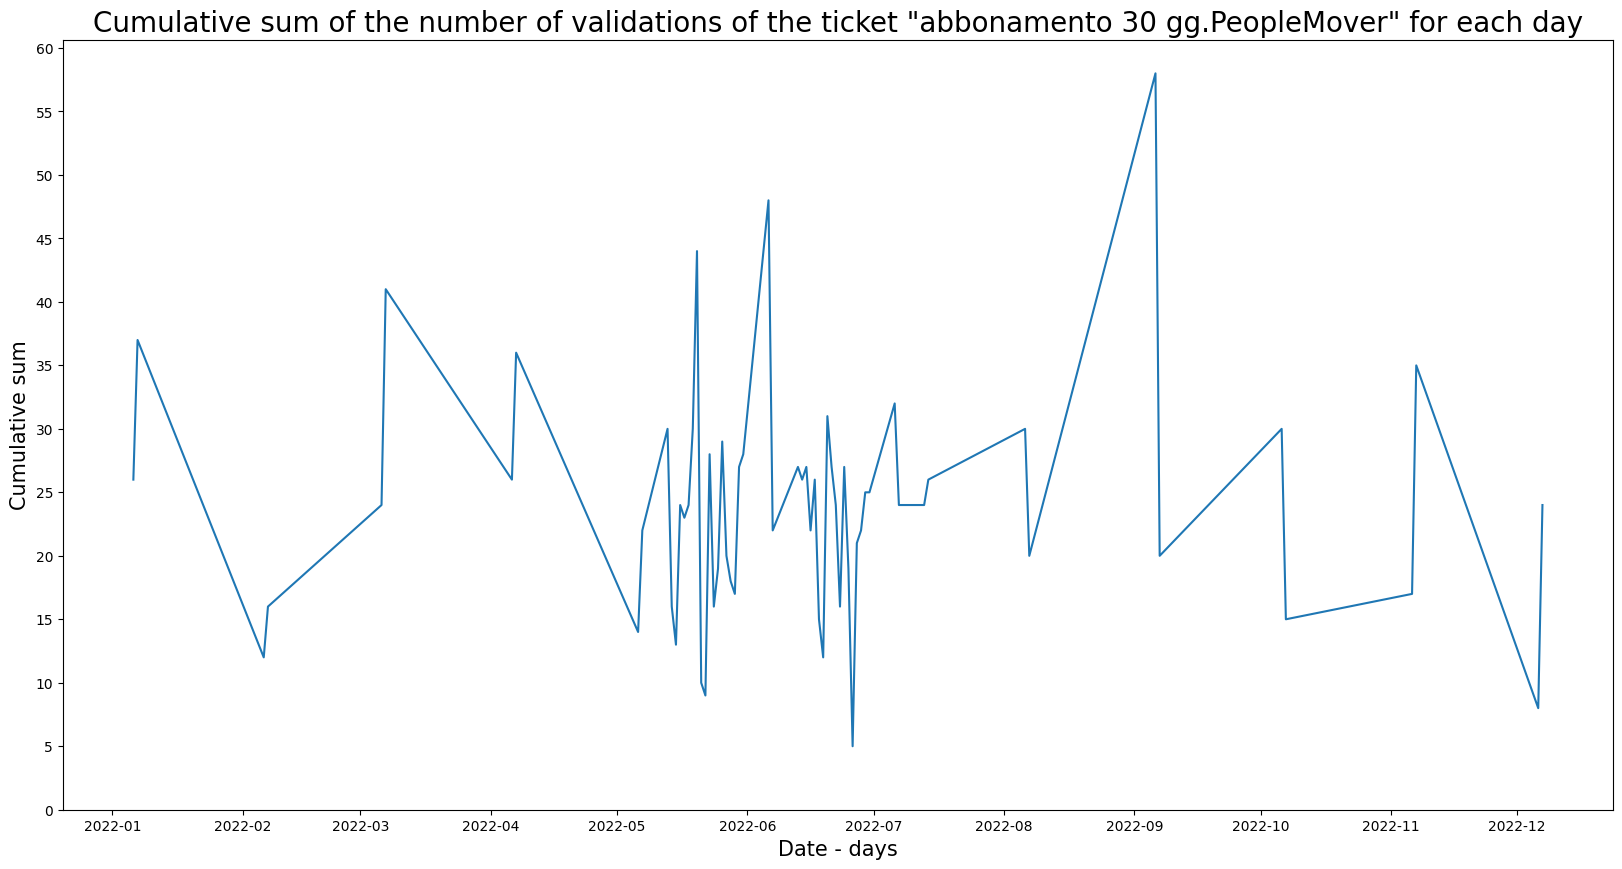

The day with the highest number of validations of the ticket "abbonamento 30 gg.PeopleMover" is 2022-09-06 with 58 validations
The day with the lowest number of validations of the ticket "abbonamento 30 gg.PeopleMover" is 2022-06-26 with 5 validations


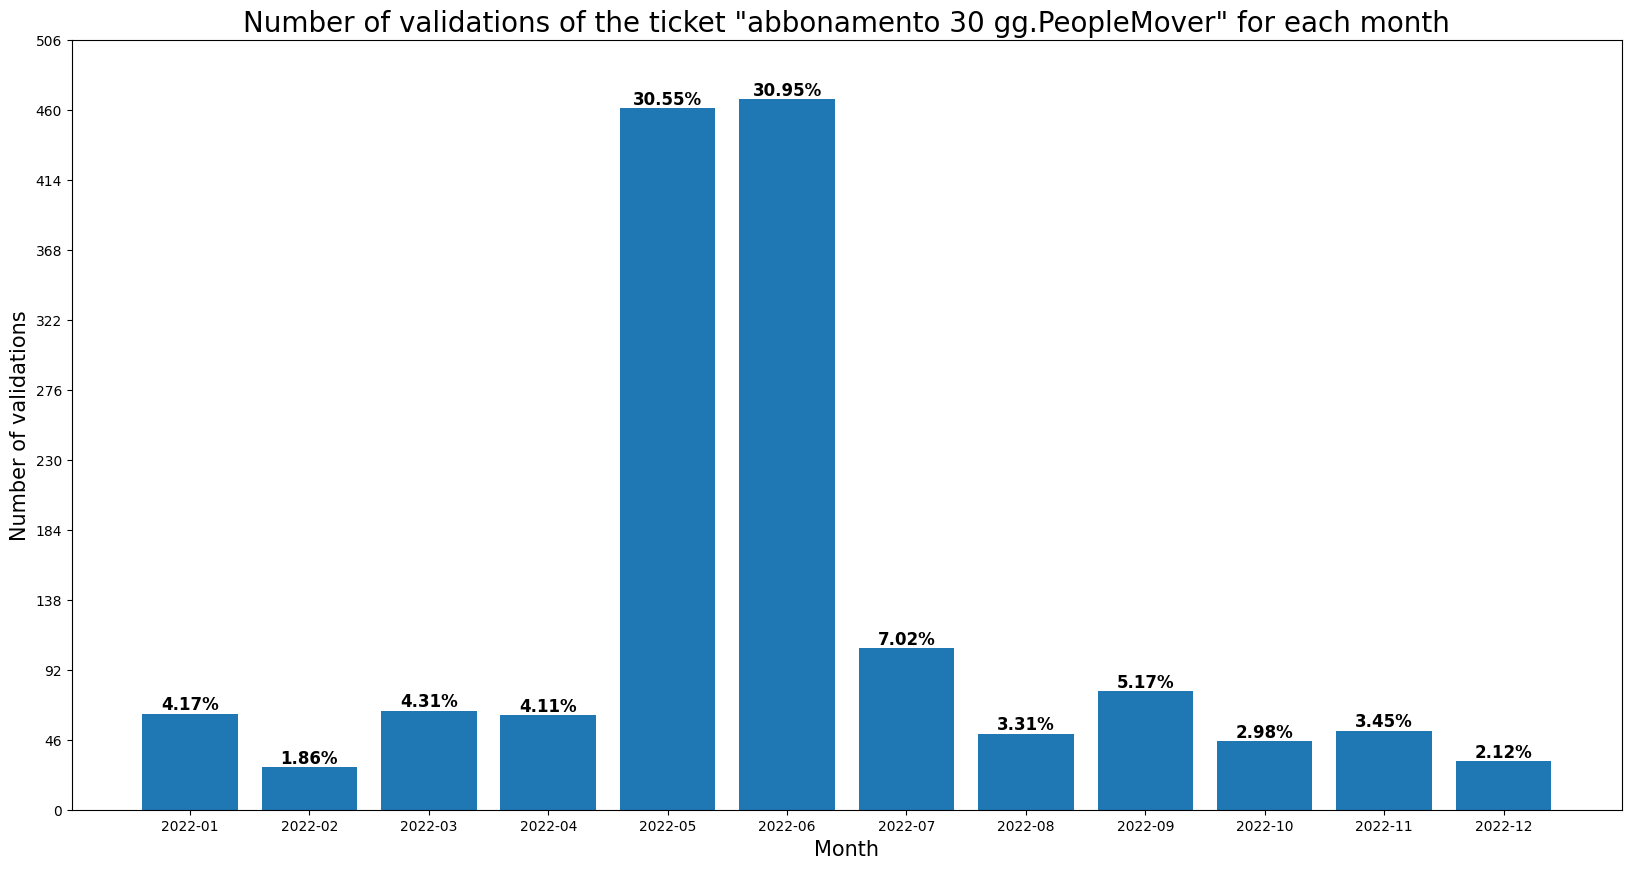

In [30]:
target_ticket = 'abbonamento 30 gg.PeopleMover'
df_PM = focus_on_ticket_type(df, target_ticket)
number_of_tickets_per_day(df_PM, target_ticket)
min_max_number_of_tickets_per_day(df_PM, target_ticket)
barplot_number_of_tickets_per_month(df_PM, target_ticket)

### Focus on the ticket codes


The dataframe of the ticket code 1 has 1103633 rows and 8 columns


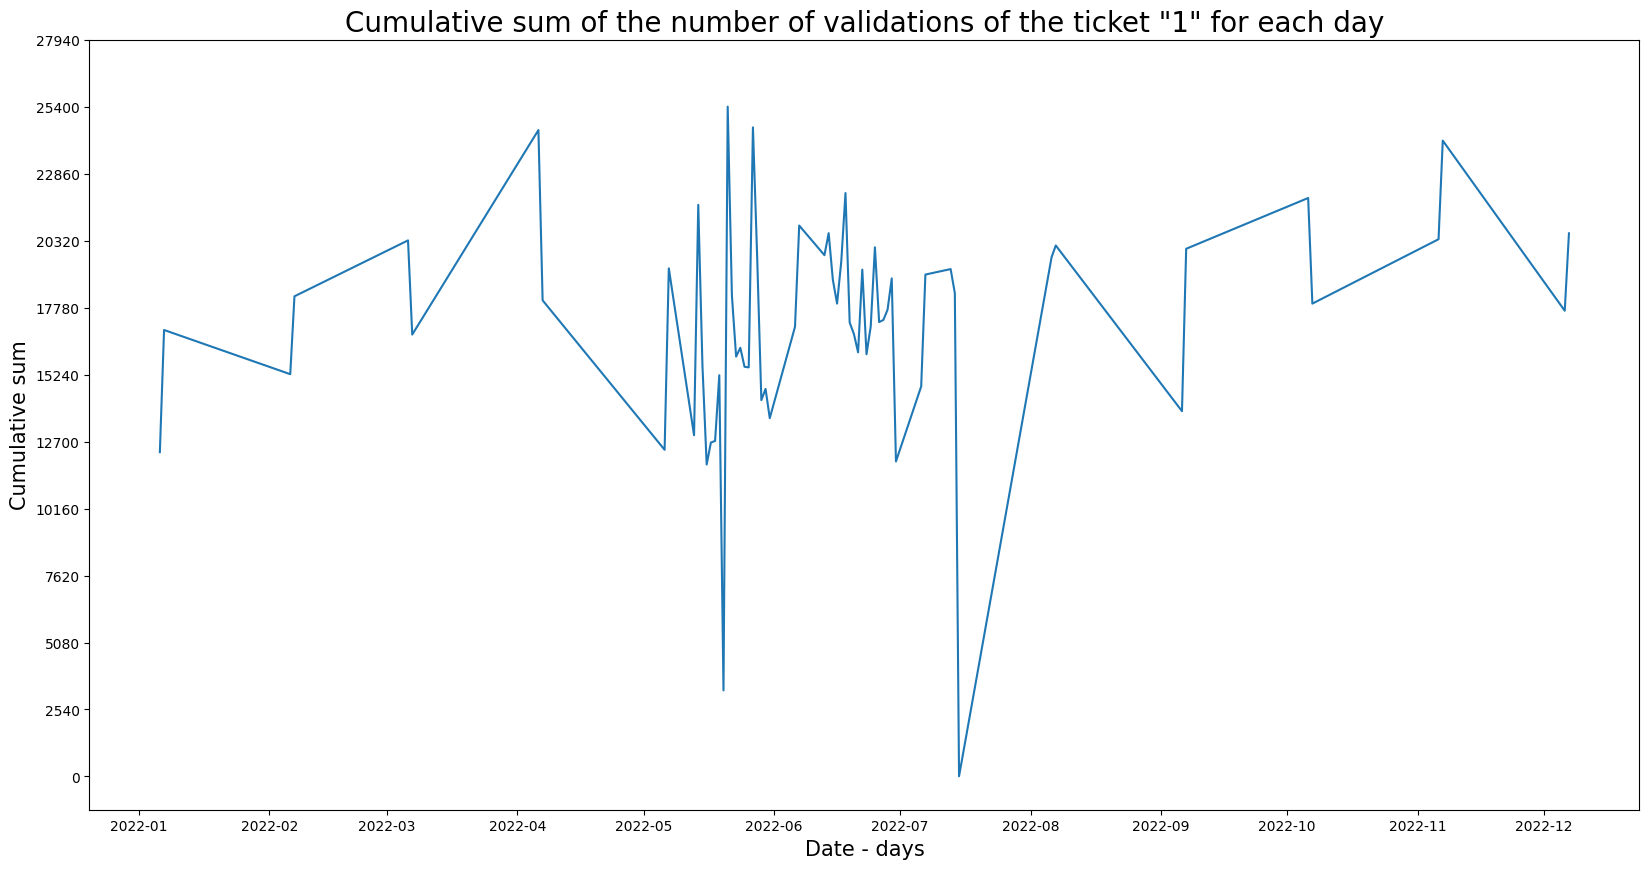

The day with the highest number of validations of the ticket "1" is 2022-05-21 with 25402 validations
The day with the lowest number of validations of the ticket "1" is 2022-07-15 with 8 validations


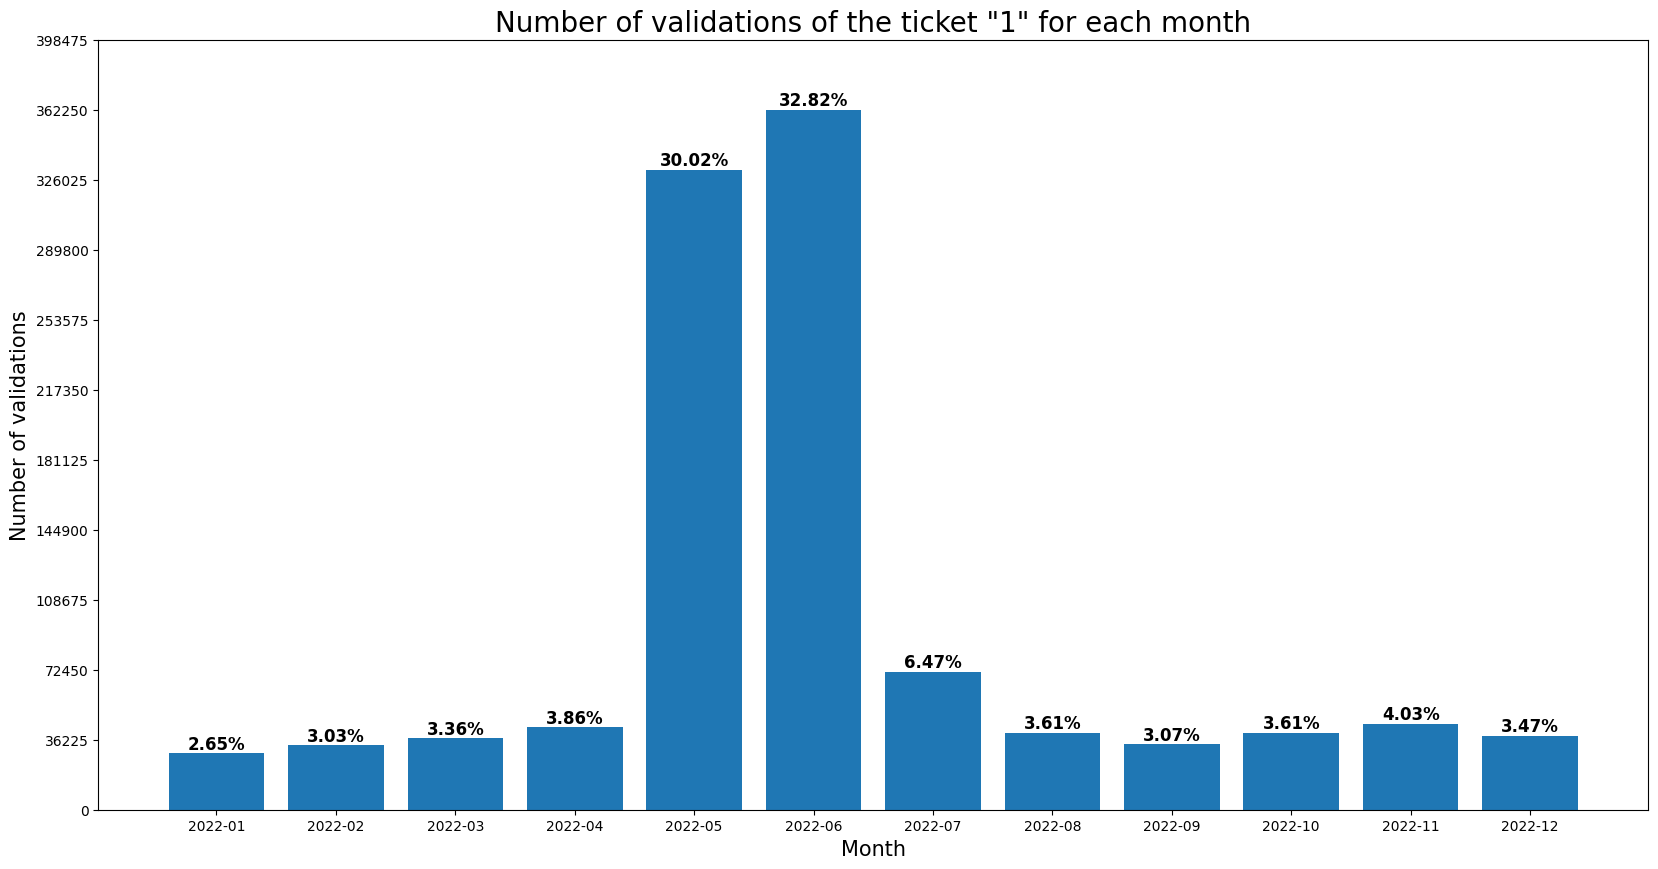

The dataframe of the ticket code 2 has 682828 rows and 8 columns


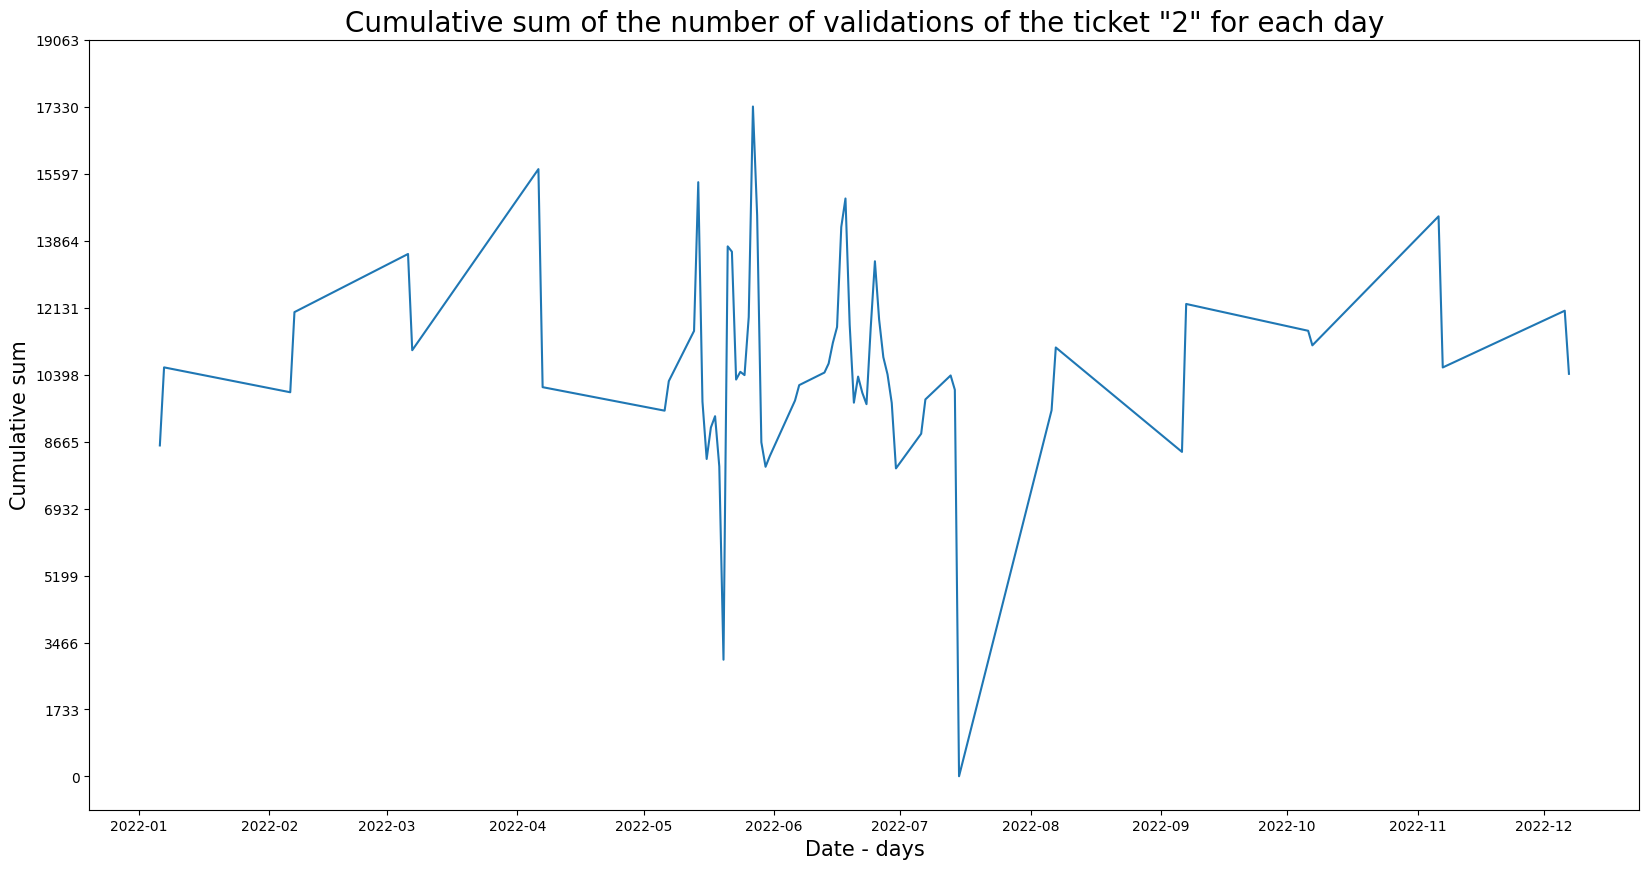

The day with the highest number of validations of the ticket "2" is 2022-05-27 with 17335 validations
The day with the lowest number of validations of the ticket "2" is 2022-07-15 with 6 validations


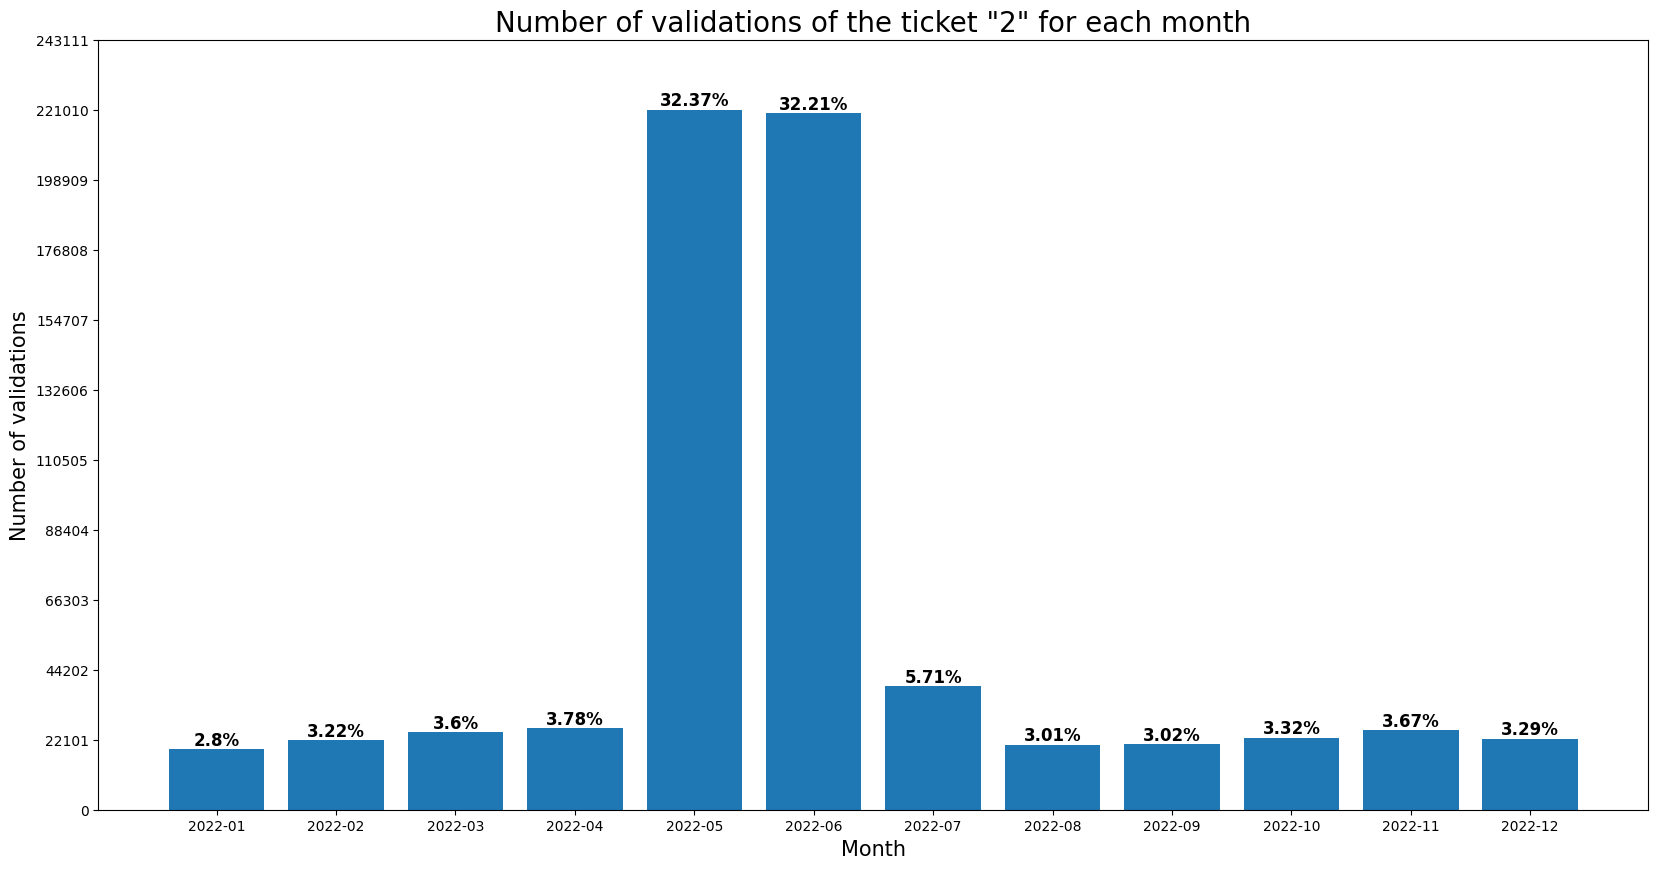

The dataframe of the ticket code 3 has 898863 rows and 8 columns


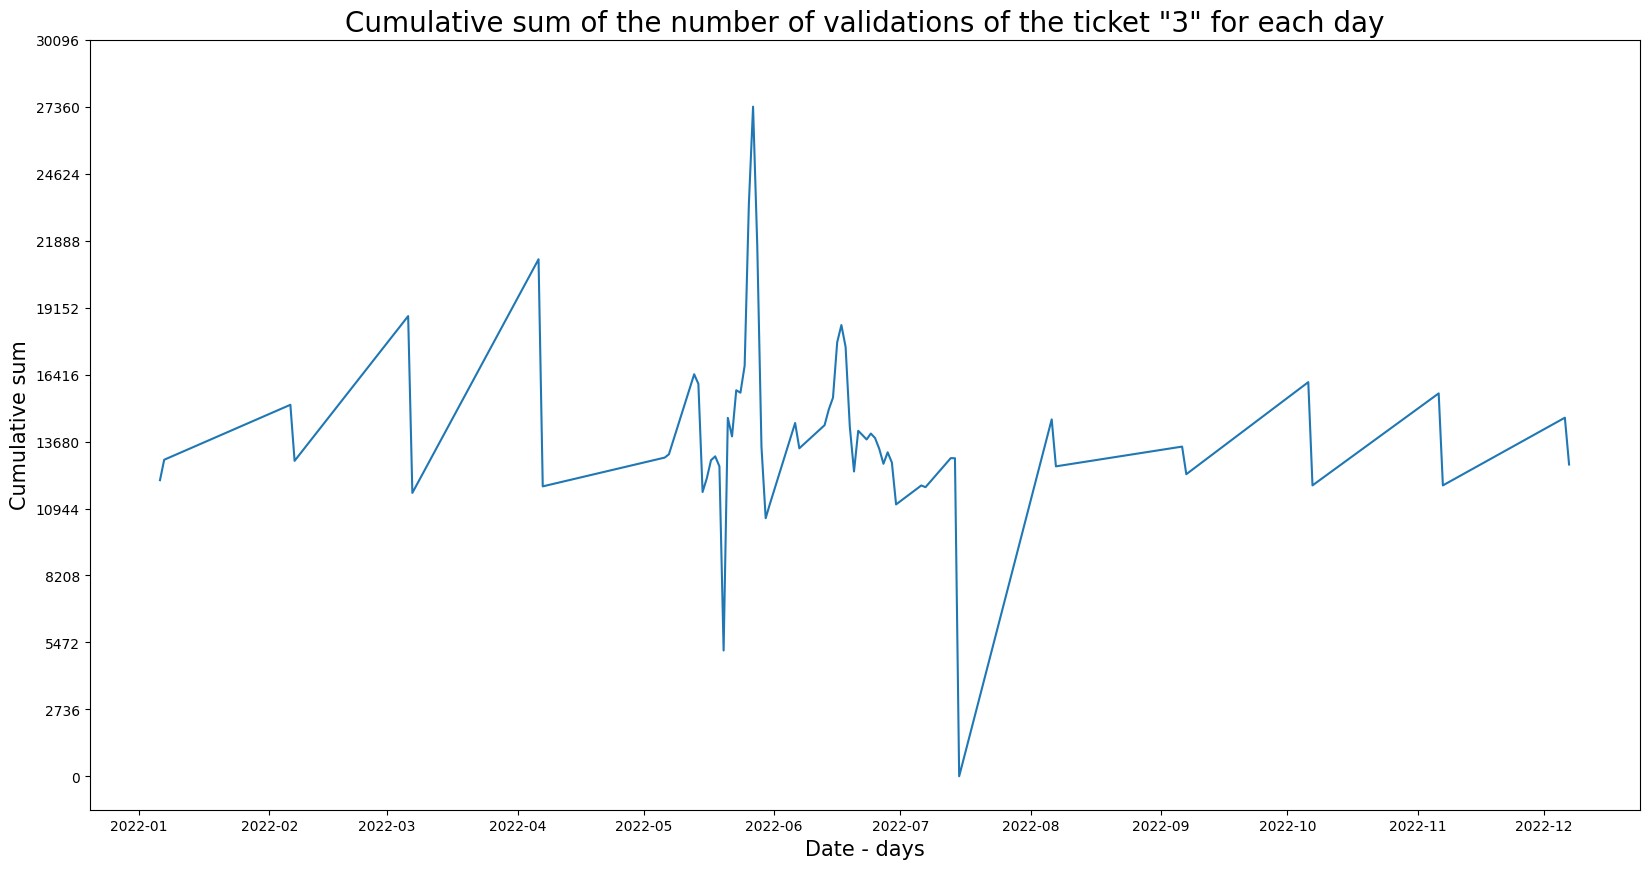

The day with the highest number of validations of the ticket "3" is 2022-05-27 with 27362 validations
The day with the lowest number of validations of the ticket "3" is 2022-07-15 with 7 validations


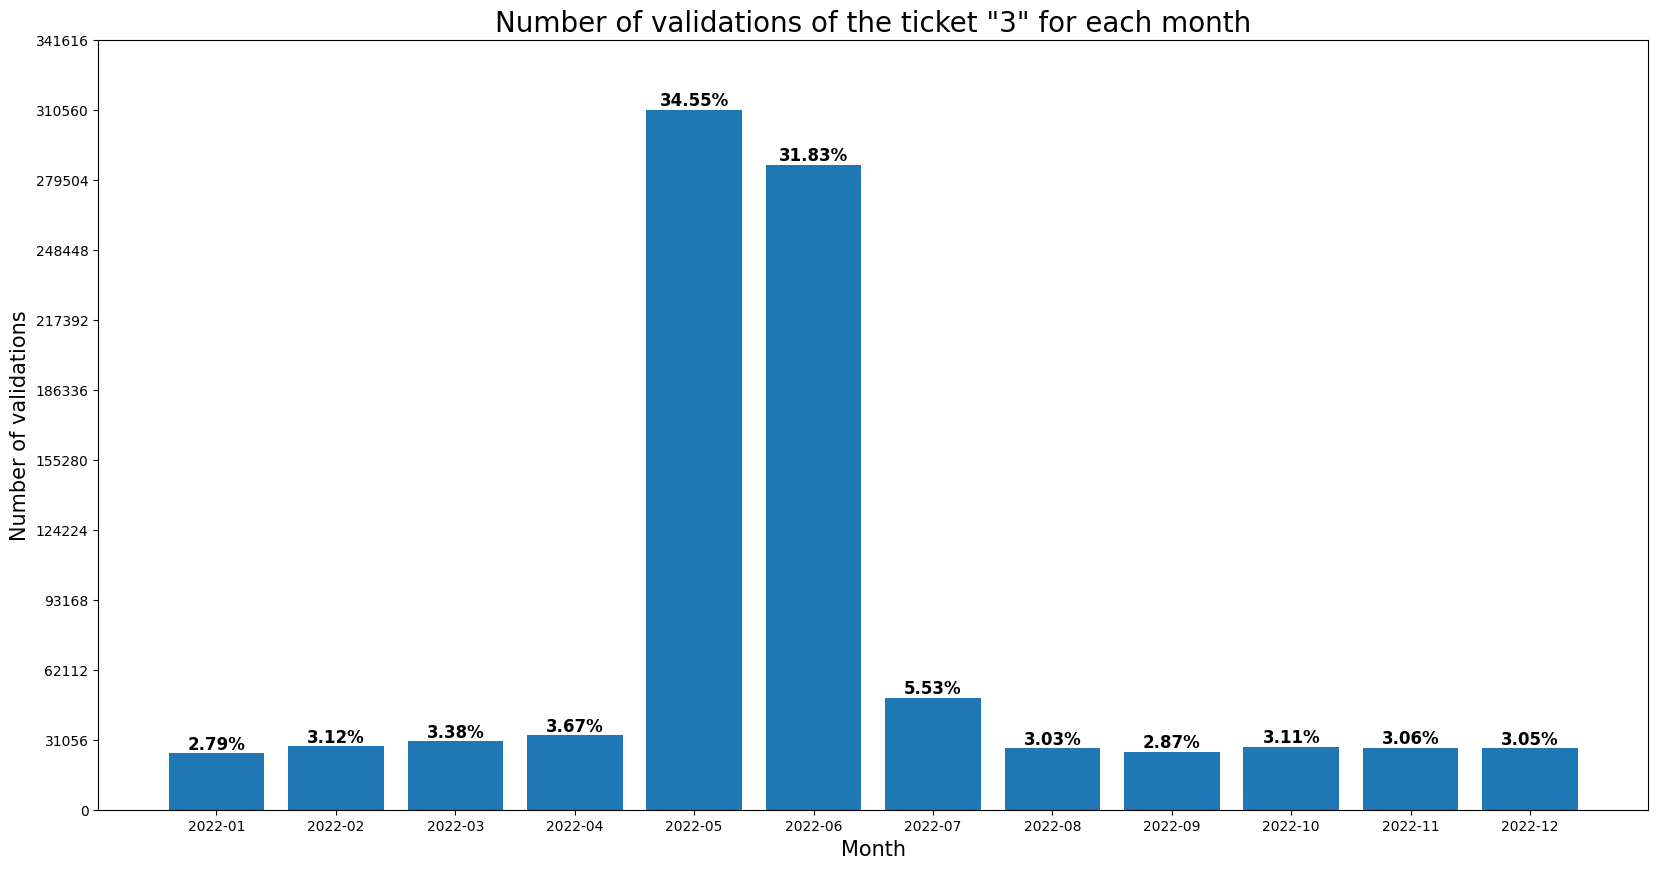

The dataframe of the ticket code 4 has 482235 rows and 8 columns


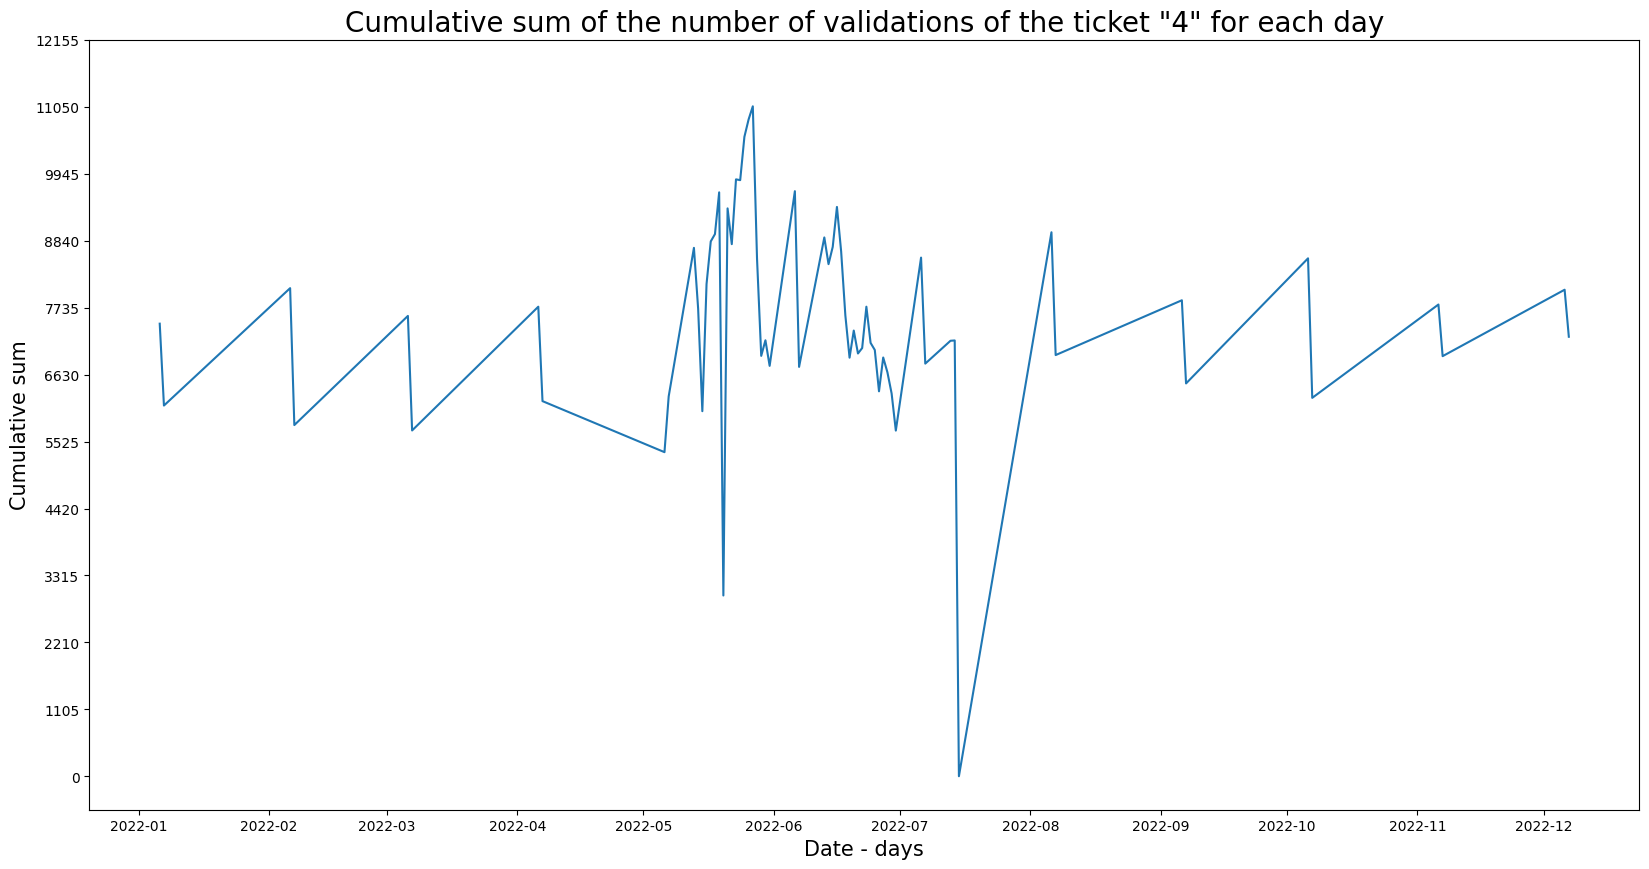

The day with the highest number of validations of the ticket "4" is 2022-05-27 with 11056 validations
The day with the lowest number of validations of the ticket "4" is 2022-07-15 with 3 validations


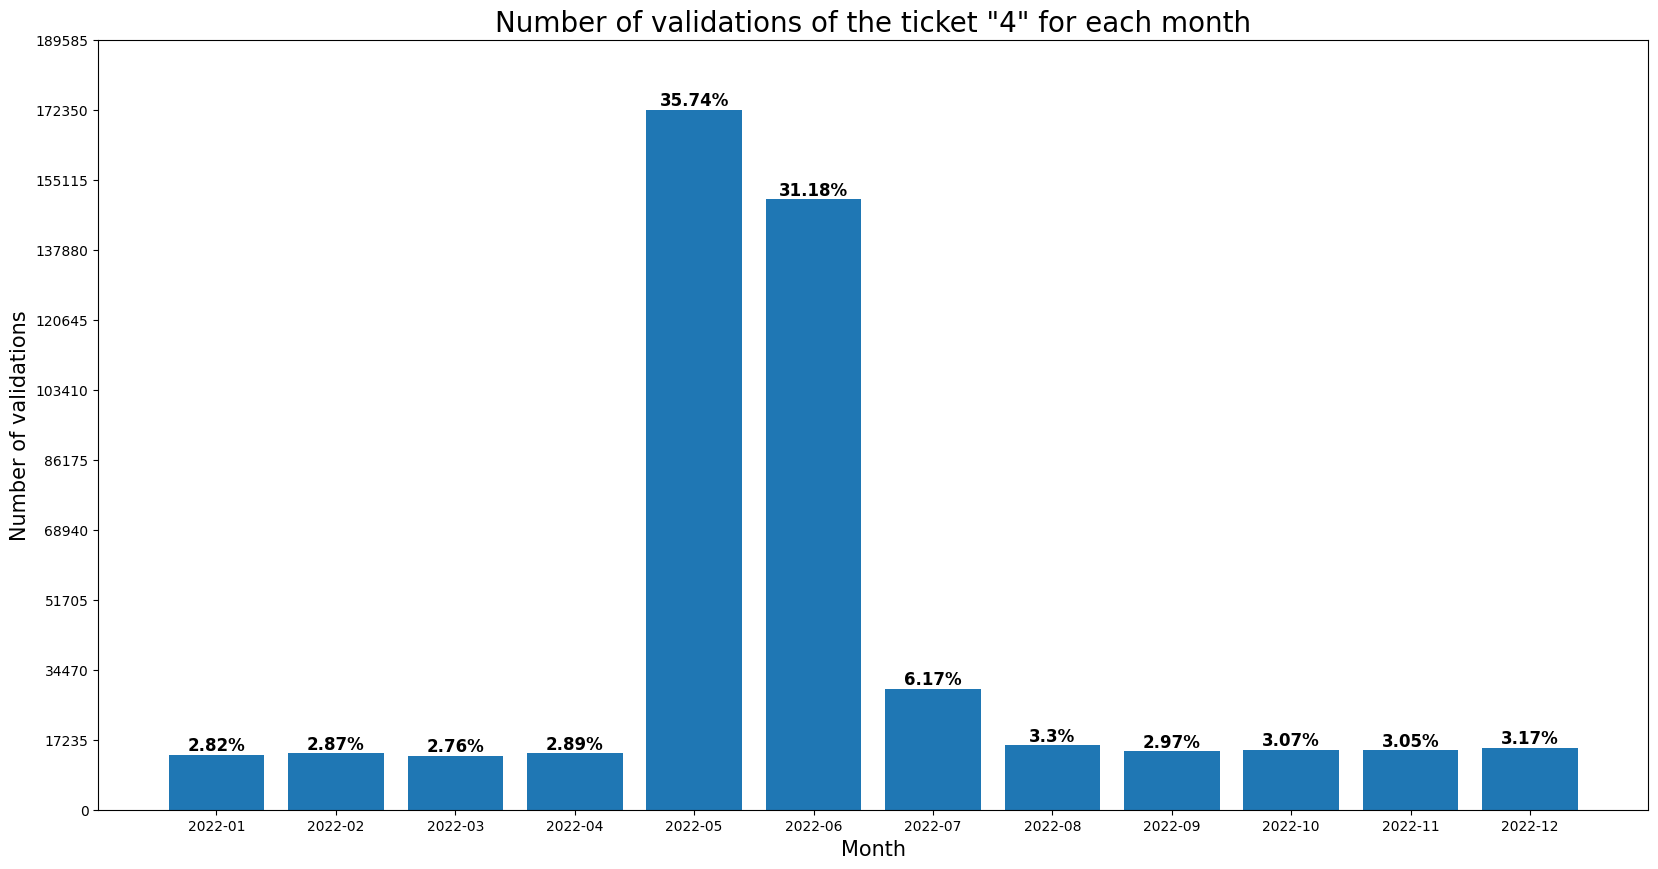

The dataframe of the ticket code 5 has 1509 rows and 8 columns


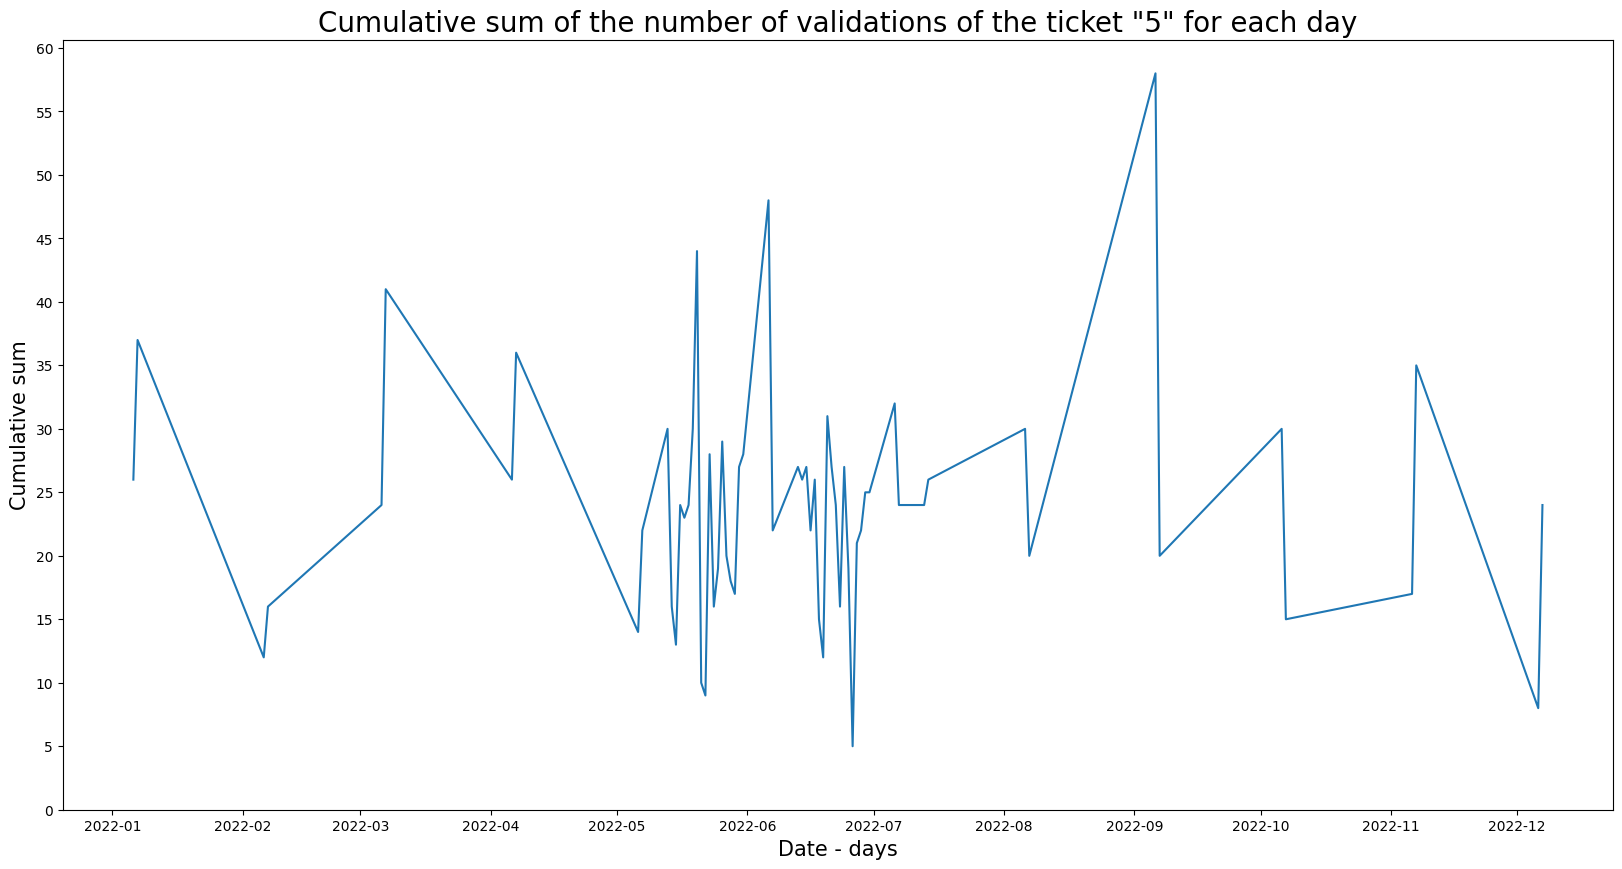

The day with the highest number of validations of the ticket "5" is 2022-09-06 with 58 validations
The day with the lowest number of validations of the ticket "5" is 2022-06-26 with 5 validations


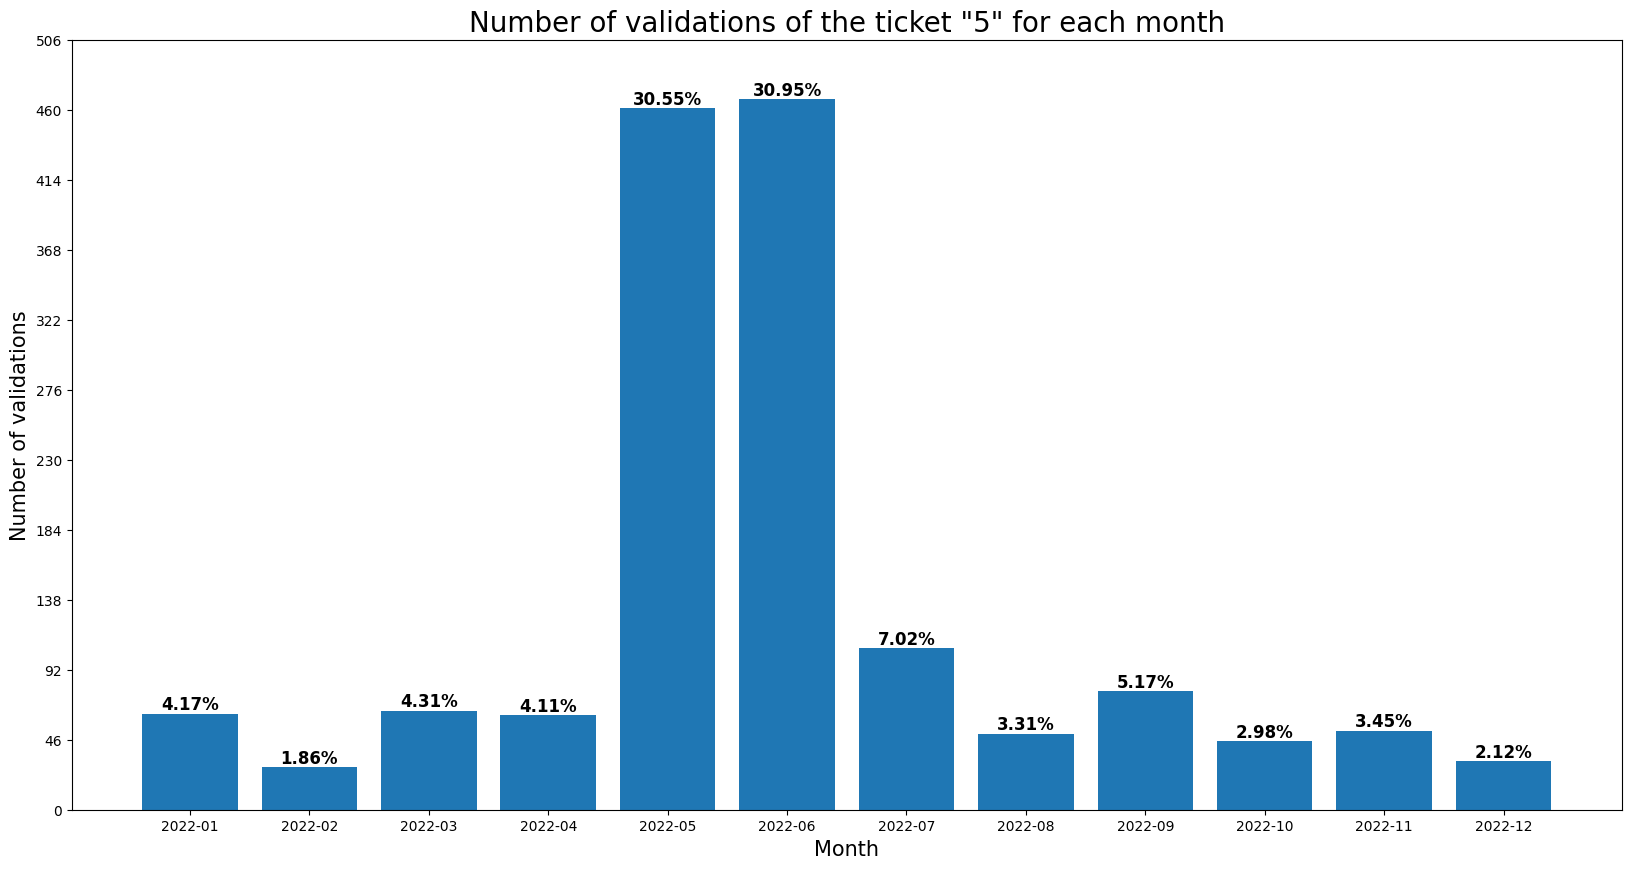

The dataframe of the ticket code 7a has 1511584 rows and 8 columns


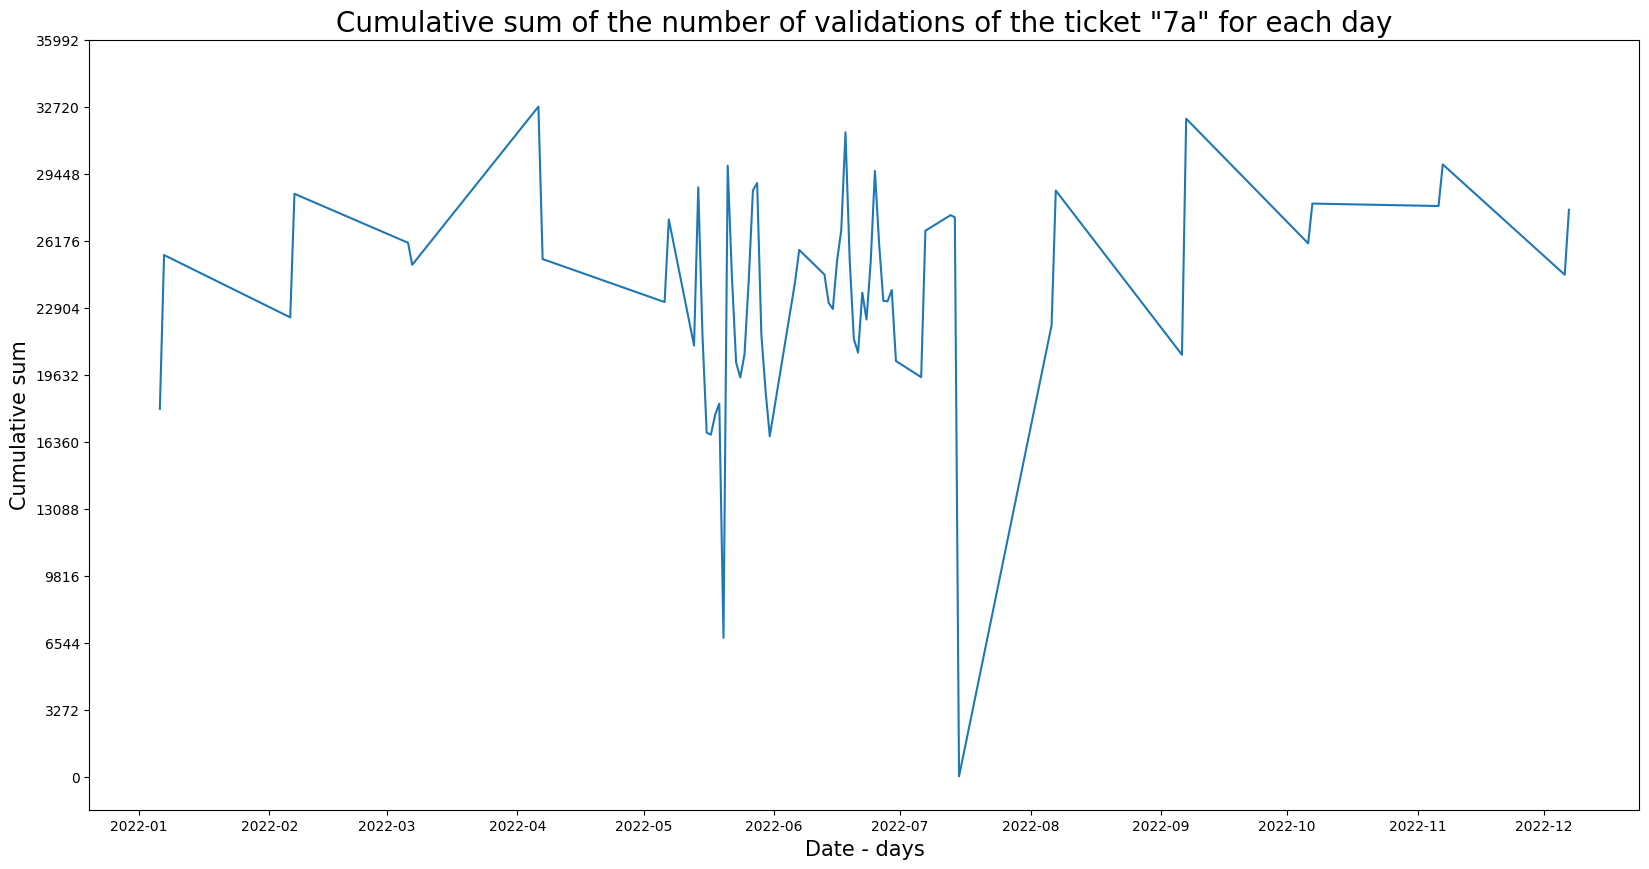

The day with the highest number of validations of the ticket "7a" is 2022-04-06 with 32724 validations
The day with the lowest number of validations of the ticket "7a" is 2022-07-15 with 19 validations


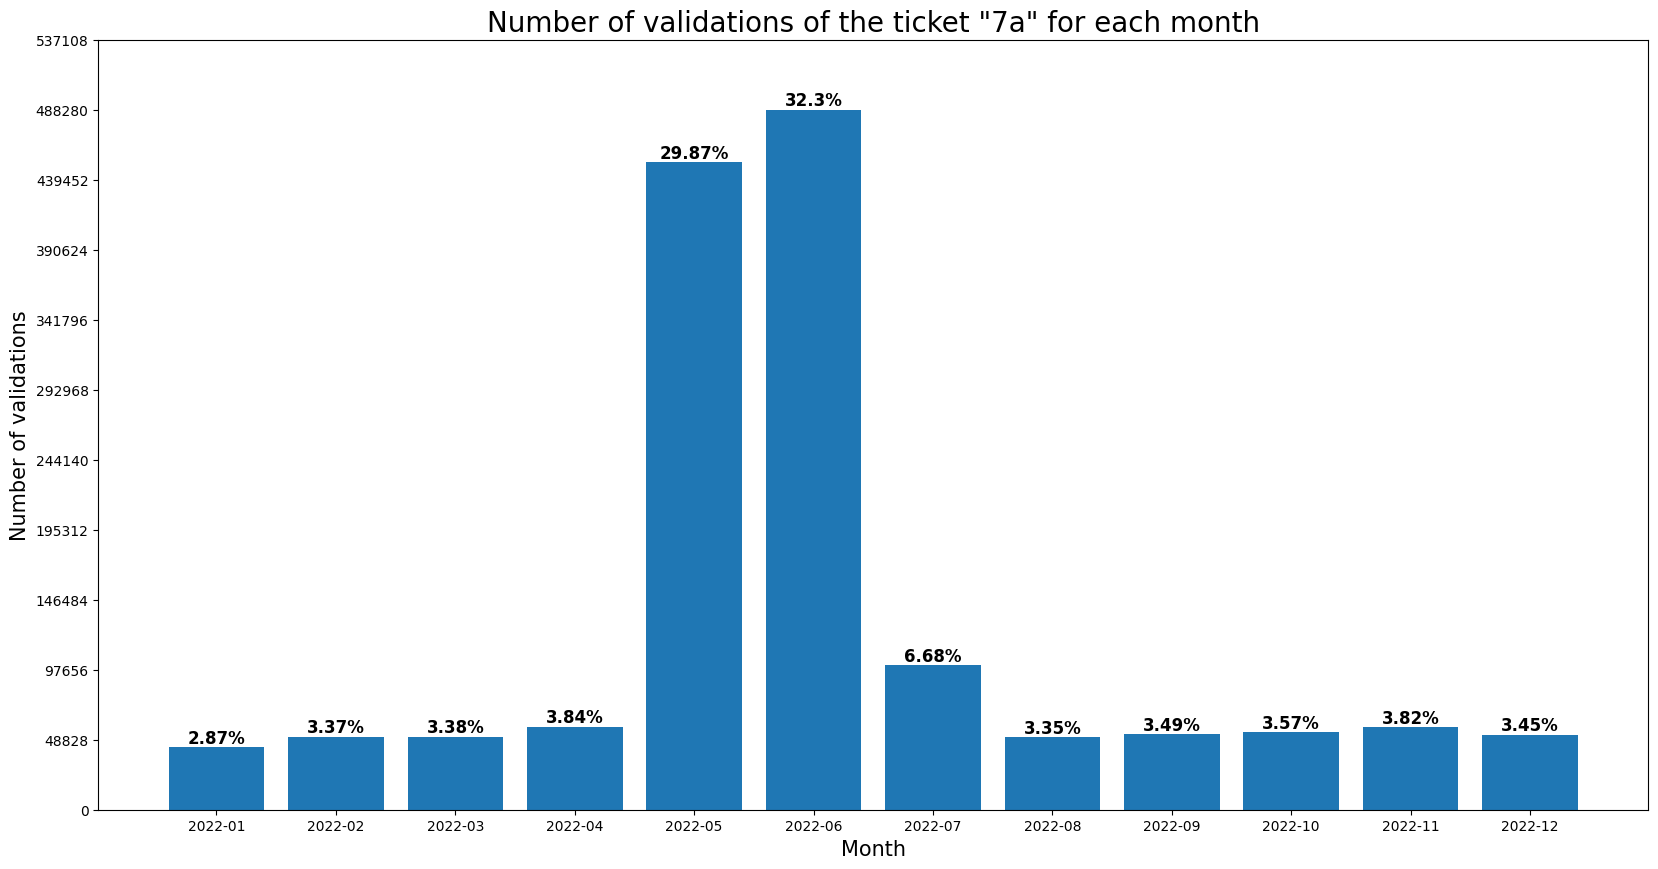

In [31]:
# The TICKET_CODEs are in the dictionary "dict_ticket_codes.json", created in Notebook 1
focus_on_all_ticket_codes(df, 'dict_ticket_codes.json')

### Focus on the ticket code ***1***


The dataframe of the ticket code 1 has 1103633 rows and 8 columns


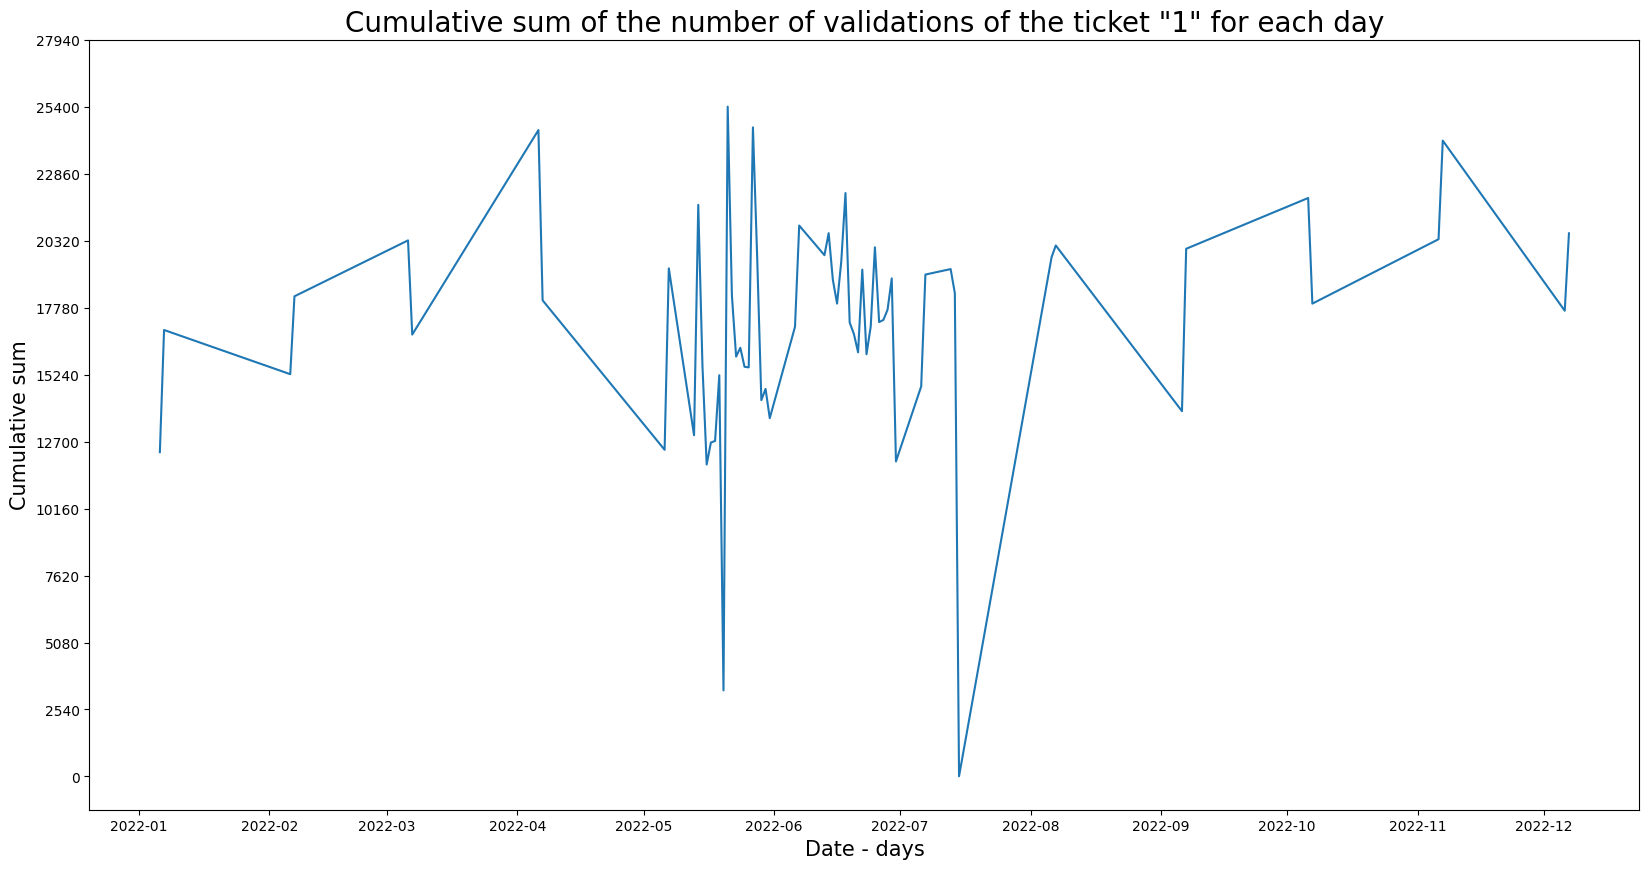

The day with the highest number of validations of the ticket "1" is 2022-05-21 with 25402 validations
The day with the lowest number of validations of the ticket "1" is 2022-07-15 with 8 validations


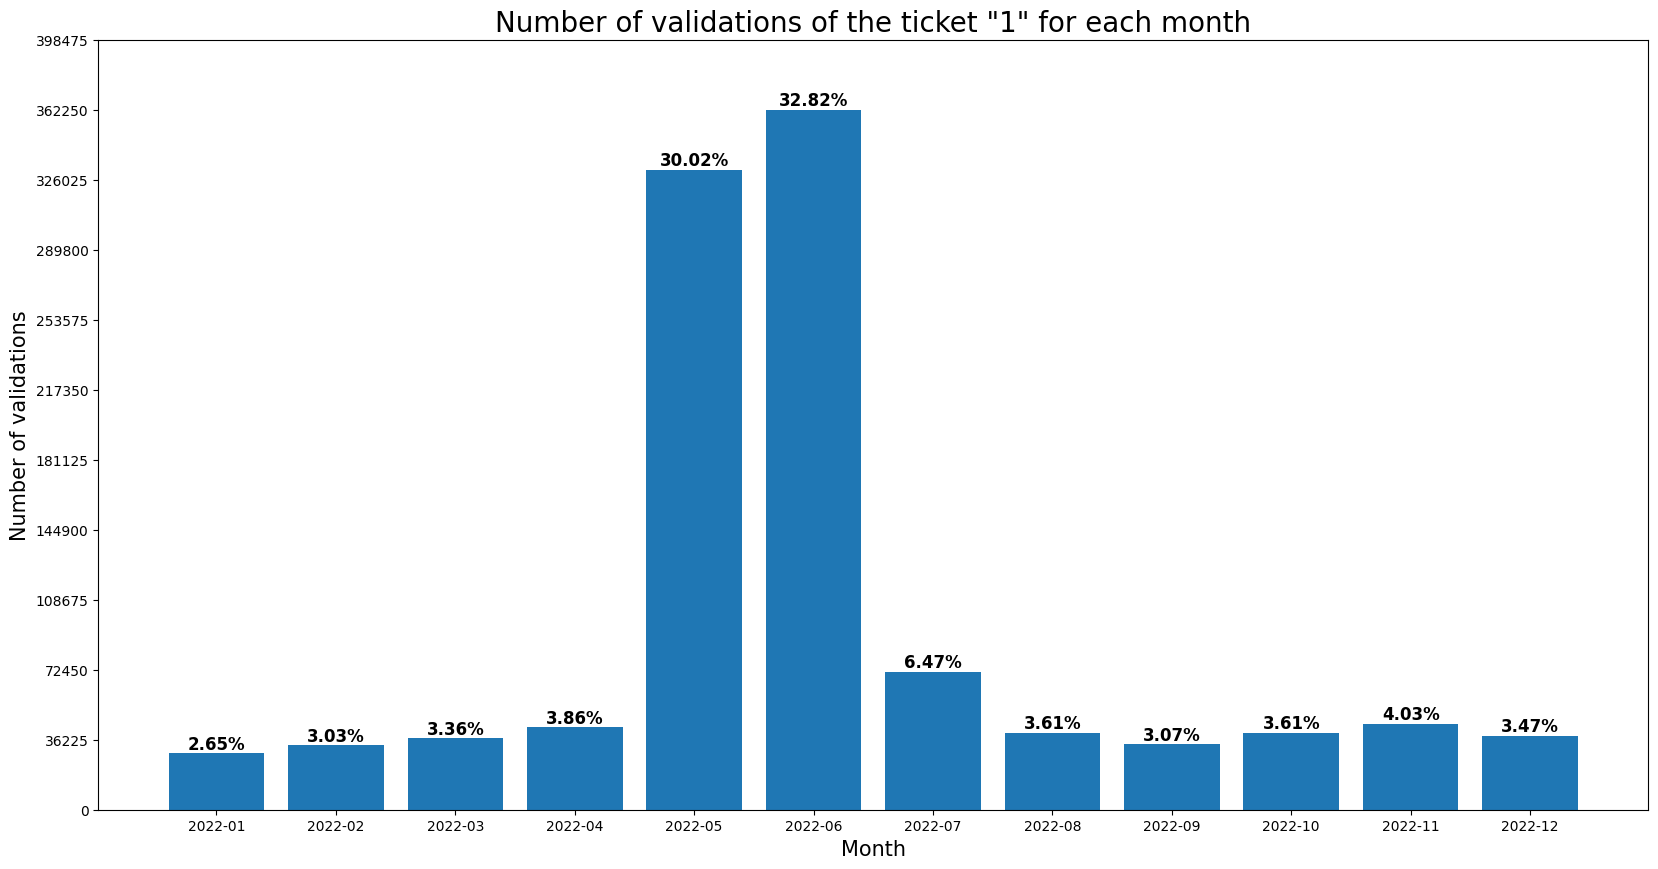

In [32]:
# Focus on TICKET_CODE = 1
target_ticket_code = '1'
df_tc1 = focus_on_ticket_code(df, target_ticket_code)
number_of_tickets_per_day(df_tc1, target_ticket_code)
min_max_number_of_tickets_per_day(df_tc1, target_ticket_code)
barplot_number_of_tickets_per_month(df_tc1, target_ticket_code)